In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
size = (224,224,3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), input_shape = size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
optm = opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
train_route = "/content/gdrive/My Drive/Colab_Notebooks/Datasets/X_ray/Datasets/chest_xray/train"
test_route = "/content/gdrive/My Drive/Colab-Notebooks/Datasets/X_ray/Datasets/chest_xray/test"

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_generator.flow_from_directory(train_route,
                                                   target_size=(224,224),batch_size=32,class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
testing_set = test_generator.flow_from_directory(test_route,
                                                target_size=(224,224),batch_size=32,class_mode='categorical')

FileNotFoundError: ignored

In [ ]:
len(training_set)

164

In [ ]:
len(testing_set)

20

In [ ]:
#Early_stp = EarlyStopping(patience = 5,
#                          restore_best_weights = True,monitor='val_loss')

In [ ]:
start = model.fit(training_set,validation_data=testing_set,
                            epochs=10,steps_per_epoch=163,
                            validation_steps=20)

Epoch 1/10
163/163 [==============================] - 1410s 9s/step - loss: 0.4785 - accuracy: 0.8086 - val_loss: 0.3617 - val_accuracy: 0.8560
Epoch 2/10
163/163 [==============================] - 390s 2s/step - loss: 0.2070 - accuracy: 0.9122 - val_loss: 0.3124 - val_accuracy: 0.8816
Epoch 3/10
163/163 [==============================] - 378s 2s/step - loss: 0.1827 - accuracy: 0.9286 - val_loss: 0.3938 - val_accuracy: 0.8544
Epoch 4/10
163/163 [==============================] - 386s 2s/step - loss: 0.1781 - accuracy: 0.9294 - val_loss: 0.3944 - val_accuracy: 0.8656
Epoch 5/10
163/163 [==============================] - 379s 2s/step - loss: 0.1681 - accuracy: 0.9359 - val_loss: 0.4113 - val_accuracy: 0.8512
Epoch 6/10
163/163 [==============================] - 388s 2s/step - loss: 0.1537 - accuracy: 0.9360 - val_loss: 0.5105 - val_accuracy: 0.8368
Epoch 7/10
163/163 [==============================] - 378s 2s/step - loss: 0.1487 - accuracy: 0.9426 - val_loss: 0.6658 - val_accuracy: 0.774

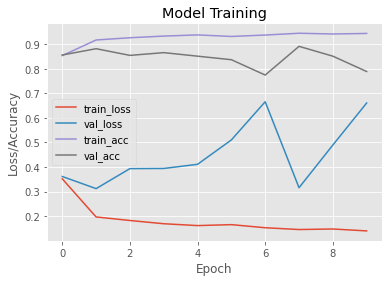

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(start.history["loss"], label="train_loss")
plt.plot(start.history["val_loss"], label="val_loss")
plt.plot(start.history["accuracy"], label="train_acc")
plt.plot(start.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/cnn.png")
model.save('/content/gdrive/My Drive/Colab Notebooks/cnn_model.h5')

<Figure size 432x288 with 0 Axes>